In [58]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs
import configs
from utils import get_firing_field

device = 'cpu'

In [67]:
def run_and_plot(exp_dir):
    num_states = 6

    # Test dataset
    dset = inputs.Sim1DWalk(num_steps=2000, num_states=num_states, left_right_stay_prob=[4,1,1])
    dg_inputs = torch.from_numpy(dset.dg_inputs.T).float().to(device).unsqueeze(1)


    with open(exp_dir + 'net_configs.p', 'rb') as f:
        net_configs = pickle.load(f)
    net_configs['num_states'] = num_states
    print(net_configs)

    # Load that model and test
    net = STDP_SR(**net_configs)
    state_dict = torch.load(exp_dir + 'model.pt')
    print(state_dict)
    net.load_state_dict(state_dict)
    net.set_num_states(num_states)
    with torch.no_grad():
        _, outputs = net(dg_inputs, reset=True)
    test_gamma = net.gamma
    test_idx = 12
    
    # Plot example activity
    plt.figure(figsize=(20,4))
    plt.imshow(outputs[-500:].numpy().T)
    plt.colorbar()
    plt.show()
    
    # Plot example activity
    plt.figure(figsize=(20,4))
    plt.imshow(outputs[:500].numpy().T)
    plt.colorbar()
    plt.show()

    # RNN T
    rnn_T = net.get_T().numpy()

    # RNN M
    rnn_M = net.get_M(gamma=test_gamma)
    try:
        rnn_M = rnn_M.numpy()
    except:
        pass
#     plt.imshow(rnn_M[test_idx].reshape((arena_len, arena_len)))
#     plt.colorbar()
#     plt.show()

    # Est M
    est_T = dset.est_T
    est_M = np.linalg.pinv(
        np.eye(est_T.shape[0]) - test_gamma*est_T
        )
#     x = est_M[test_idx,:].reshape((arena_len,arena_len))
#     plt.imshow(x)
#     plt.colorbar()
#     plt.show()

    plt.imshow(rnn_M)
    plt.title('RNN M')
    plt.colorbar()
    plt.show()

    plt.imshow(est_M)
    plt.title('True M')
    plt.colorbar()
    plt.show()
    
    plt.imshow(est_T)
    plt.title('True T')
    plt.colorbar()
    plt.show()

    return np.mean(np.abs(rnn_T - est_T)), np.mean(np.abs(rnn_M - est_M))

{'gamma': 0.6, 'num_states': 6}
OrderedDict([('ca3.A_pos', tensor([1.0195])), ('ca3.tau_pos', tensor([0.4734])), ('ca3.A_neg', tensor([-1.2145])), ('ca3.tau_neg', tensor([0.4420])), ('ca3.alpha_self', tensor([1.3701])), ('ca3.alpha_other', tensor([-0.3353])), ('ca3.update_clamp_a', tensor([1.3026])), ('ca3.update_clamp_b', tensor([-1.2248]))])


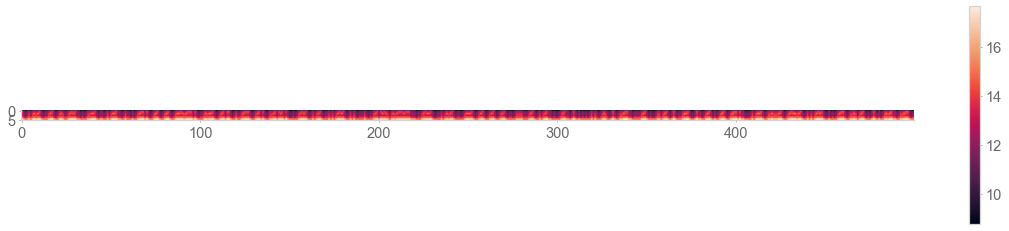

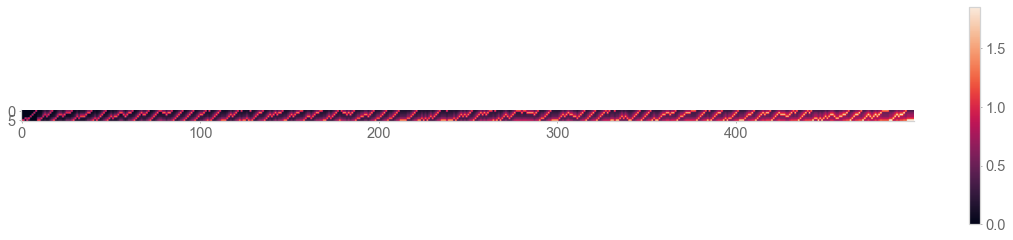

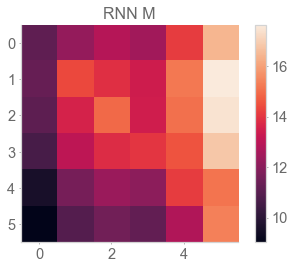

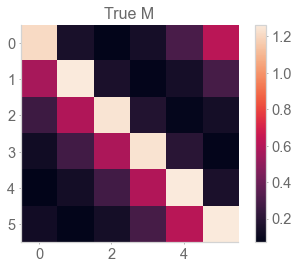

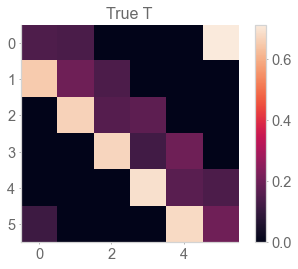

(0.11413365966439609, 12.89626486325421)

In [68]:
exp_dir = "/home/chingf/engram/Ching/02_gamma_v_ss/0.6/1/"
run_and_plot(exp_dir)

{'gamma': 0.8, 'ca3_kwargs': {'A_pos_sign': 1, 'A_neg_sign': -1, 'output_params': {'num_iterations': 15, 'input_clamp': 15, 'nonlinearity': None}}, 'num_states': 20}
OrderedDict([('ca3.A_pos', tensor([-0.2067])), ('ca3.tau_pos', tensor([0.5109])), ('ca3.A_neg', tensor([-0.1108])), ('ca3.tau_neg', tensor([0.7438])), ('ca3.alpha_self', tensor([0.3275])), ('ca3.alpha_other', tensor([0.4958])), ('ca3.update_clamp_a', tensor([1.1310])), ('ca3.update_clamp_b', tensor([-0.2848]))])


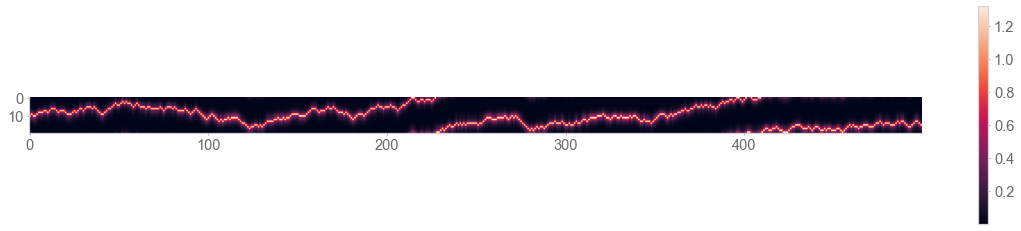

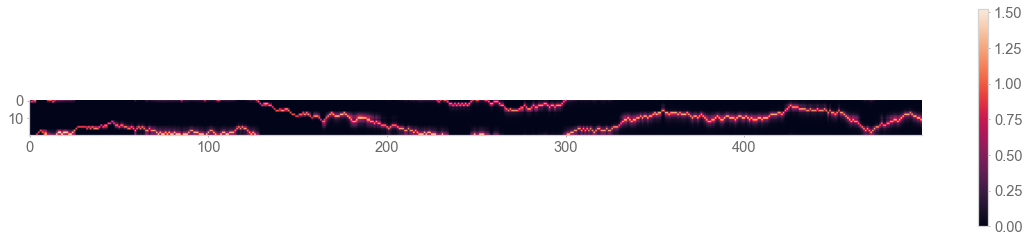

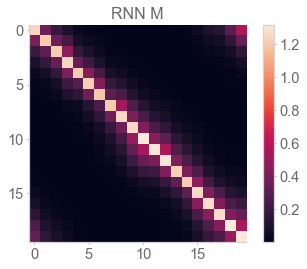

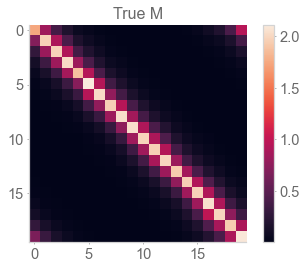

(0.030450053299738853, 0.10212086783177785)

In [55]:
exp_dir = "/home/chingf/engram/Ching/02_gamma_v_rsteps/0.8/15/None/1/"
run_and_plot(exp_dir)

{'gamma': 0.8, 'ca3_kwargs': {'A_pos_sign': 1, 'A_neg_sign': -1, 'output_params': {'num_iterations': 20, 'input_clamp': 20, 'nonlinearity': None}}, 'num_states': 20}
OrderedDict([('ca3.A_pos', tensor([1.2092])), ('ca3.tau_pos', tensor([0.5143])), ('ca3.A_neg', tensor([-0.4021])), ('ca3.tau_neg', tensor([1.2270])), ('ca3.alpha_self', tensor([1.8803])), ('ca3.alpha_other', tensor([0.3551])), ('ca3.update_clamp_a', tensor([1.1513])), ('ca3.update_clamp_b', tensor([-2.4807]))])


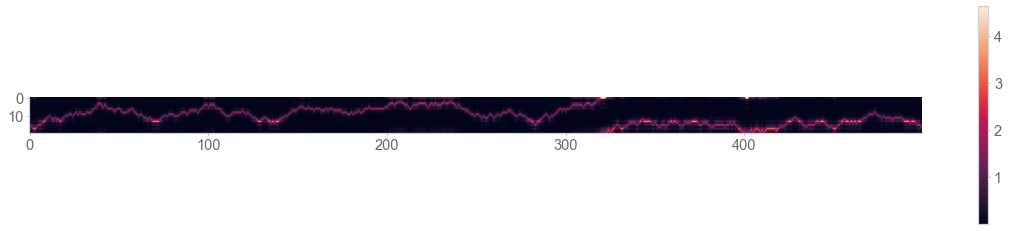

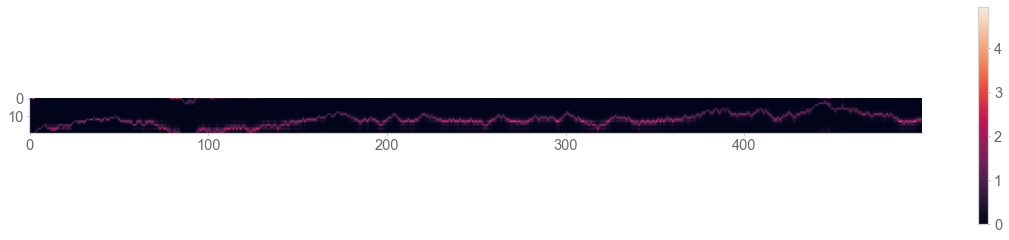

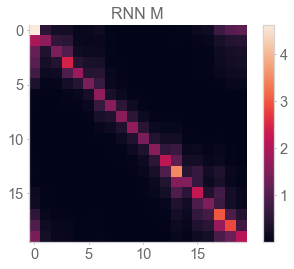

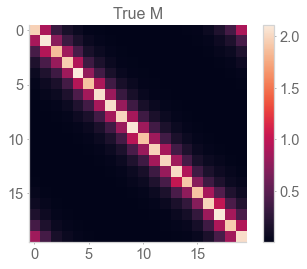

(0.024144004018290196, 0.12055442366548733)

In [56]:
exp_dir = "/home/chingf/engram/Ching/02_gamma_v_rsteps/0.8/20/None/0/"
run_and_plot(exp_dir)

{'gamma': 0.8, 'ca3_kwargs': {'A_pos_sign': 1, 'A_neg_sign': -1, 'output_params': {'num_iterations': 20, 'input_clamp': 20, 'nonlinearity': 'relu'}}, 'num_states': 20}
OrderedDict([('ca3.A_pos', tensor([2.4418])), ('ca3.tau_pos', tensor([0.6184])), ('ca3.A_neg', tensor([-2.4514])), ('ca3.tau_neg', tensor([6.6889])), ('ca3.alpha_self', tensor([1.8455])), ('ca3.alpha_other', tensor([0.2530])), ('ca3.update_clamp_a', tensor([0.9217])), ('ca3.update_clamp_b', tensor([-1.9226])), ('ca3.relu_bias', tensor([0.0068]))])


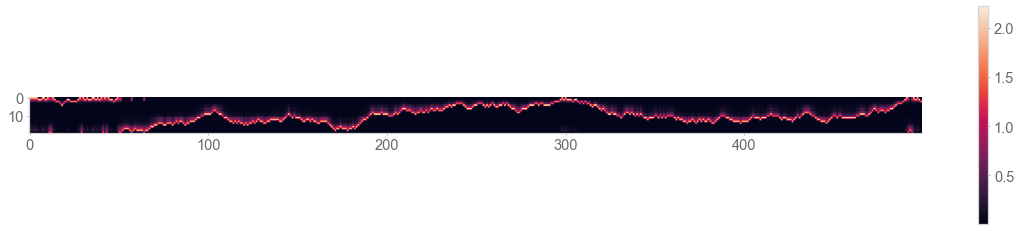

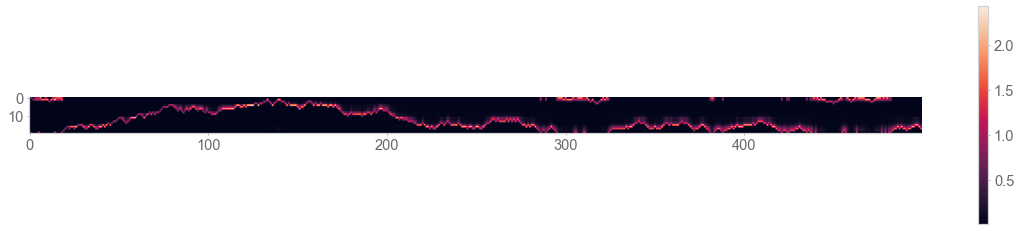

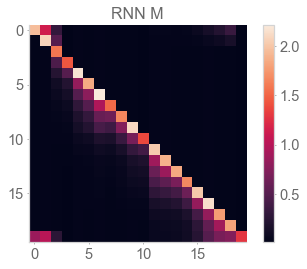

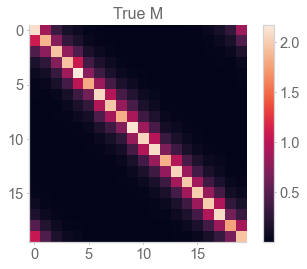

(0.034309795164626185, 0.11930953041143473)

In [57]:
exp_dir = "/home/chingf/engram/Ching/02_gamma_v_rsteps/0.8/20/relu/2/"
run_and_plot(exp_dir)